In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [16]:
bms = pd.read_csv('bms.csv', sep=';', index_col=0)
bms.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
bms.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
bms.shape

(8523, 11)

In [19]:
bms.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
bms["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

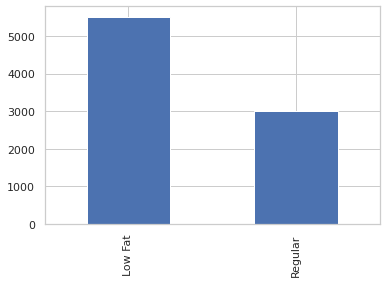

In [67]:
bms["Item_Fat_Content"].value_counts().plot(kind="bar")

There is an inconsistent data in Item_Fat_Content Variable, so we need to replace "LF" and "low fat" to "Low Fat, "reg" to "Regular".

In [21]:
bms["Item_Fat_Content"]=bms["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat")
bms["Item_Fat_Content"]=bms["Item_Fat_Content"].replace("reg","Regular")

In [22]:
bms['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Detecting Missing Values

In [23]:
bms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [24]:
bms.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We know that there is some missing values in Item_Weight and Outlet_Size Variable, the persentation of missing values in Item_Weight Variable is 17.16% and 28.28% in Outlet_Sales Variable. Based on the correlation matrix above, we don't need to drop this missing values or variables but we need to cleaning this missing values by imputing with mean, median, or mode.

# Cleaning Missing Values

In [25]:
from sklearn.impute import SimpleImputer
from scipy.stats import mode

In [26]:
bms["Item_Weight"]=bms["Item_Weight"].fillna(bms["Item_Weight"].mean())
bms["Outlet_Size"]=bms["Outlet_Size"].fillna(bms["Outlet_Size"].mode()[0])

In [27]:
bms.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Handling Duplicate Records

In [28]:
dup = bms.duplicated()
print(dup.sum())
bms[dup]

0


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,


We know that in this dataset, there are no duplicate data

# Handling Outliers

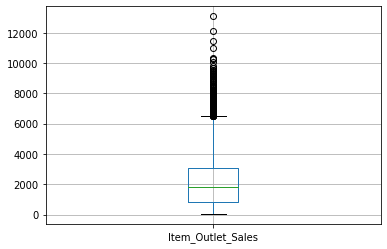

In [29]:
bms.boxplot(["Item_Outlet_Sales"])

In [30]:
bms["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

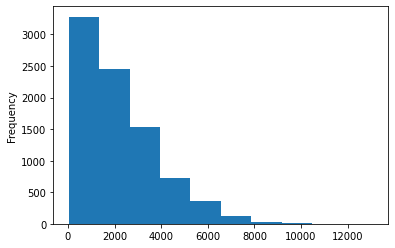

In [31]:
bms["Item_Outlet_Sales"].plot(kind="hist")

# Normalization

In [32]:
from scipy import stats
z=np.abs(stats.zscore(bms._get_numeric_data()))
print(z)

[[0.84187169 0.97073217 1.74745381 0.13954076 0.910601  ]
 [1.64170589 0.90811123 1.48902325 1.33410274 1.01844035]
 [1.09855449 0.95691733 0.01004021 0.13954076 0.04923754]
 ...
 [0.53424315 0.59978449 0.89720755 0.73682175 0.57909963]
 [1.33644372 1.53287976 0.60797692 1.33410274 0.19672492]
 [0.45963367 0.41193591 1.05226104 0.09937163 0.82959407]]


In [33]:
z.shape

(8523, 5)

In [34]:
bms_new=bms[(z<3).all(axis=1)]
print(bms_new.shape)

(8338, 11)


In [35]:
bms_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
import seaborn as sns
sns.set(style="whitegrid")

In [37]:
c=pd.DataFrame([])
c["Keterangan:"]=["Tidak ada outlier","Outlier"]
c["Jumlah observasi"]=[len(bms_new),len(bms)-len(bms_new)]
c

,Keterangan:,Jumlah observasi
0,Tidak ada outlier,8338
1,Outlier,185


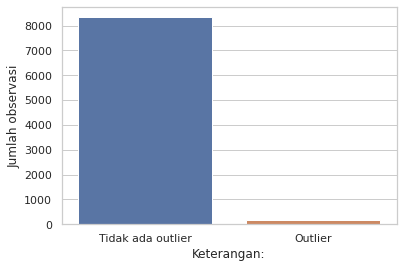

In [38]:
plot=sns.barplot(x="Keterangan:",y="Jumlah observasi",data=c)

# Transformation or Recording Categorical Value

In [39]:
bms_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
kategori=["Item_Fat_Content", "Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for feature in kategori:
    if feature in bms_new.columns.values:
        bms_new[feature]=le.fit_transform(bms_new[feature])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
bms_new.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

# Feature Selection

In [42]:
bmsx=np.array([bms_new["Item_Weight"],bms_new["Item_Fat_Content"],bms_new["Item_Visibility"],bms_new['Item_MRP'],bms_new["Outlet_Size"]])
bmsx.shape

(5, 8338)

In [43]:
bmsx

array([[9.30000000e+00, 5.92000000e+00, 1.75000000e+01, ...,
        1.06000000e+01, 7.21000000e+00, 1.48000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.60473010e-02, 1.92782160e-02, 1.67600750e-02, ...,
        3.51862710e-02, 1.45220646e-01, 4.48782800e-02],
       [2.49809200e+02, 4.82692000e+01, 1.41618000e+02, ...,
        8.51224000e+01, 1.03133200e+02, 7.54670000e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00]])

In [44]:
bmsxt=bmsx.transpose()
bmsxt.shape

(8338, 5)

In [45]:
bms_std=StandardScaler().fit_transform(bmsxt)
bms_std

array([[-0.8371775 , -0.73664489, -1.0115072 ,  1.77183095, -0.27887393],
       [-1.63203555,  1.35750619, -0.94331963, -1.48293919, -0.27887393],
       [ 1.09117635, -0.73664489, -0.9964643 ,  0.02459721, -0.27887393],
       ...,
       [-0.53146287, -0.73664489, -0.60758452, -0.88777846,  1.38320672],
       [-1.32867257,  1.35750619,  1.71466062, -0.59691305, -0.27887393],
       [ 0.45623057, -0.73664489, -0.40303734, -1.04370833,  1.38320672]])

In [46]:
pcafs=PCA(n_components=0.70,whiten=True)
bmsfs_pca=pcafs.fit_transform(bms_std)

In [47]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfs_pca.shape[1])

Original number of features: 5
Reduced numer of features: 4


In [48]:
datafs_pca=pd.DataFrame(bmsfs_pca, columns=["PC1","PC2","PC3","PC4"])
datafs_pca

,PC1,PC2,PC3,PC4
0,-0.912433,0.546175,0.290143,2.055451
1,0.418725,-2.355724,0.592925,0.338264
2,-1.441137,0.525621,-0.212325,-0.392709
3,-0.733764,1.033857,1.395953,-0.405072
4,-1.811051,-2.231591,0.419211,-0.000375
...,...,...,...,...
8333,-0.909913,-0.550853,1.188352,1.557060
8334,0.629122,-1.238035,0.897021,0.336711
8335,-0.012503,-0.597001,-1.701556,0.339143
8336,2.045007,-1.169950,0.780045,-0.190434


# Feature Extraction

In [49]:
pcafe=decomposition.PCA(n_components=3)
bmsfe_pca=pcafe.fit_transform(bms_std)

In [50]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfe_pca.shape[1])

Original number of features: 5
Reduced numer of features: 3


In [51]:
datafe_pca=pd.DataFrame(bmsfe_pca, columns=["PC1","PC2", "PC3"])
datafe_pca

,PC1,PC2,PC3
0,-0.944303,0.552666,0.290285
1,0.433350,-2.383720,0.593214
2,-1.491475,0.531868,-0.212429
3,-0.759394,1.046143,1.396634
4,-1.874310,-2.258112,0.419416
...,...,...,...
8333,-0.941696,-0.557400,1.188931
8334,0.651097,-1.252748,0.897458
8335,-0.012940,-0.604096,-1.702386
8336,2.116437,-1.183854,0.780425


## Let's take a look distributed

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


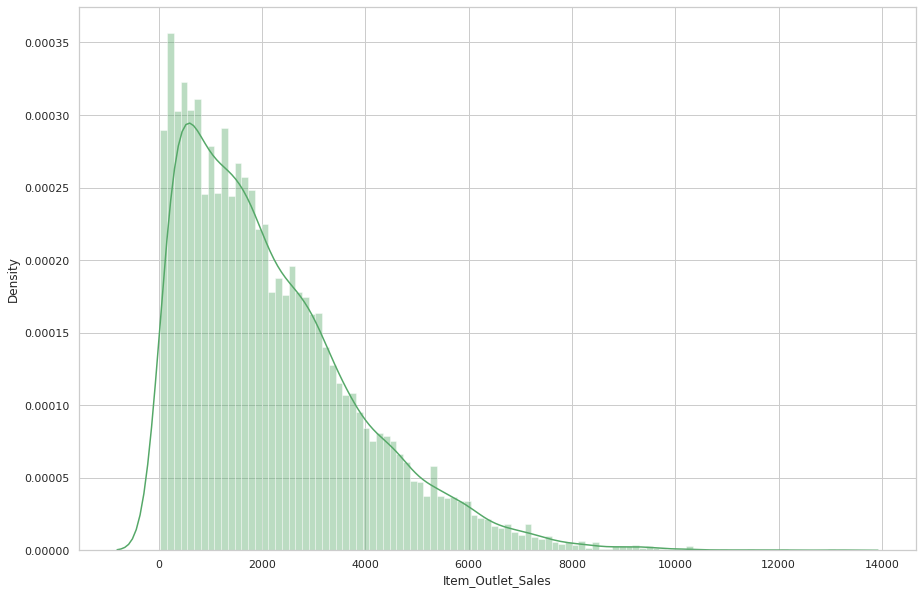

In [52]:
print(bms['Item_Outlet_Sales'].describe())
plt.figure(figsize=(15, 10))
sns.distplot(bms['Item_Outlet_Sales'], color='g', bins=100, hist_kws={'alpha': 0.4})

From the visualization above, it can be seen that the Item Outlet Sales skewed right

# Numerical Data Distribution

In [53]:
list(set(bms.dtypes.to_list()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [54]:
bms_num = bms.select_dtypes(include = ['float64', 'int64'])
bms_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
FDA15,9.30,0.016047,249.8092,1999,3735.1380
DRC01,5.92,0.019278,48.2692,2009,443.4228
FDN15,17.50,0.016760,141.6180,1999,2097.2700
FDX07,19.20,0.000000,182.0950,1998,732.3800
NCD19,8.93,0.000000,53.8614,1987,994.7052


let's plot them all

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cf8989cf8>,
      dtype=object)

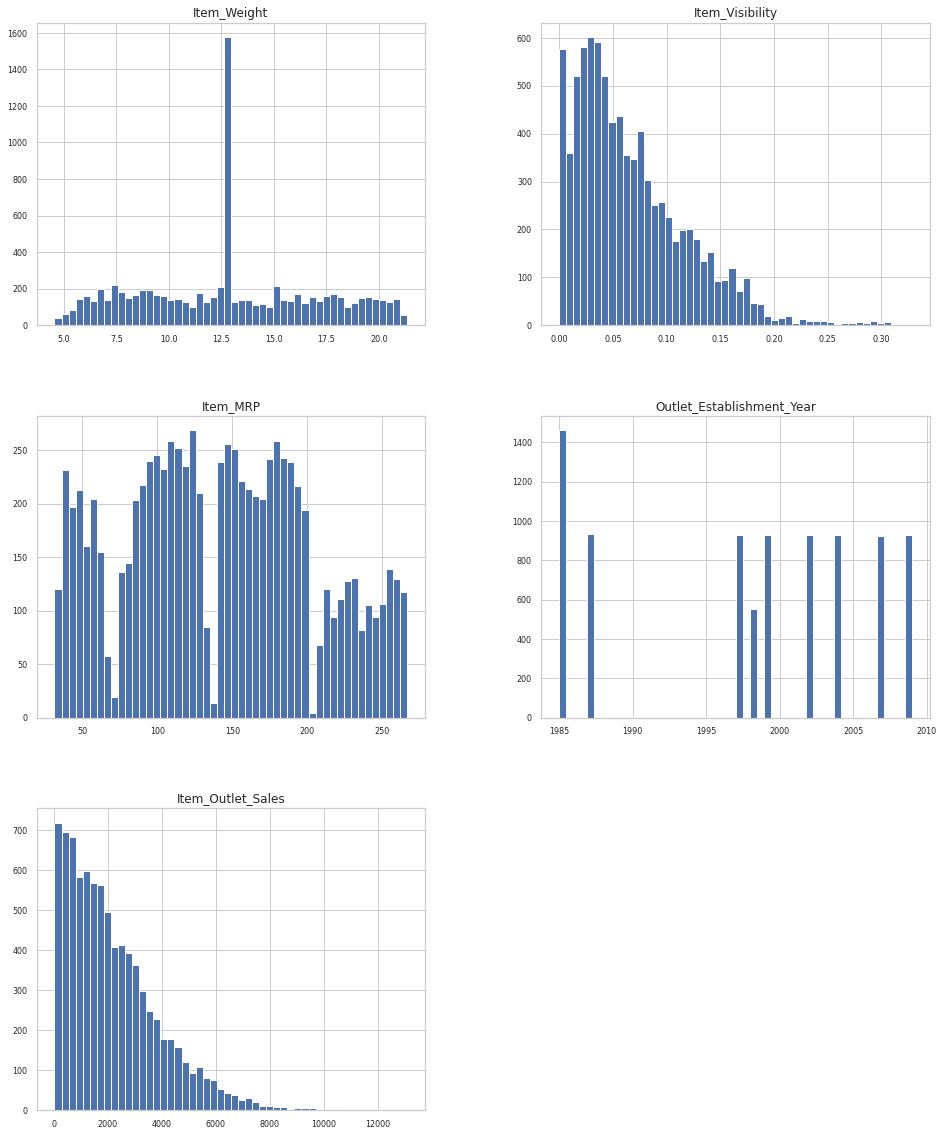

In [55]:
bms_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

# Correlation

In [56]:
bms_num_corr = bms_num.corr()['Item_Outlet_Sales'][:-1] # -1 because the latest row is Item_Outlet_Sales
gold_features_list = bms_num_corr[abs(bms_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Item Outlet Sales:\n{}".format(len(gold_features_list), gold_features_list))

There is 1 strongly correlated values with Item Outlet Sales:
Item_MRP    0.567574
Name: Item_Outlet_Sales, dtype: float64


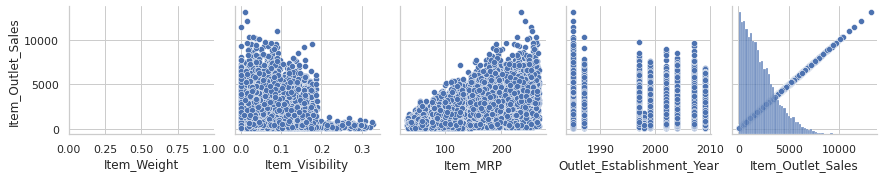

In [57]:
for i in range(0, len(bms_num.columns), 5):
    sns.pairplot(data=bms_num,
                x_vars=bms_num.columns[i:i+5],
                y_vars=['Item_Outlet_Sales'])

# Feature Relationships using Heatmap

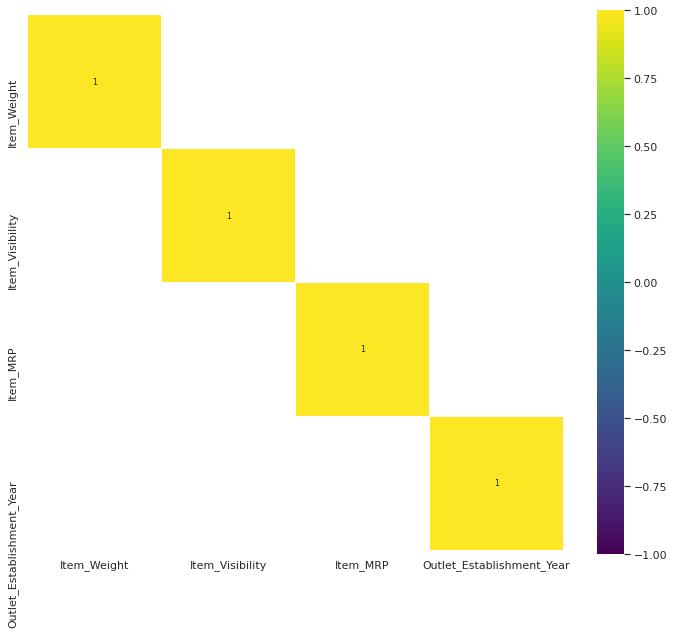

In [58]:
corr = bms_num.drop('Item_Outlet_Sales', axis=1).corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={'size': 8}, square=True)

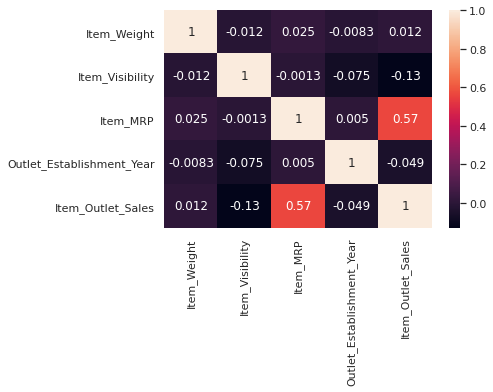

In [65]:
sns.heatmap(bms_num[bms_num.columns].corr(),annot=True)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:434: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


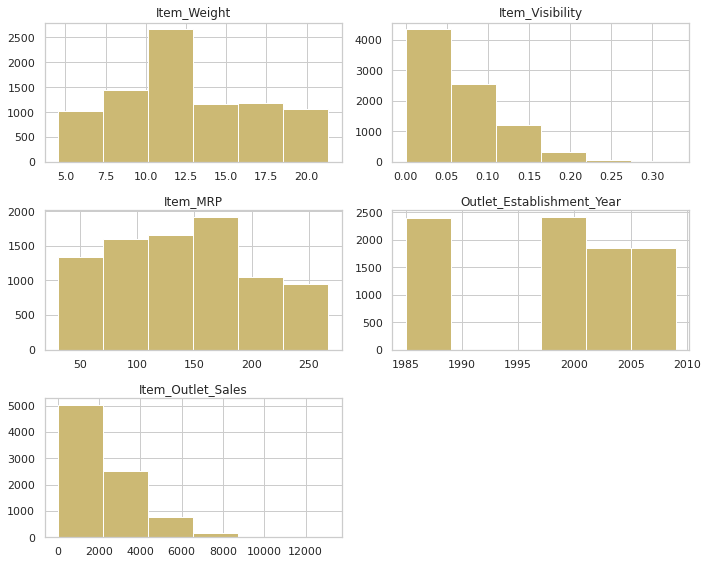

In [59]:
bms_num.hist(figsize=(10,8),bins=6,color='Y')
plt.tight_layout()
plt.show()

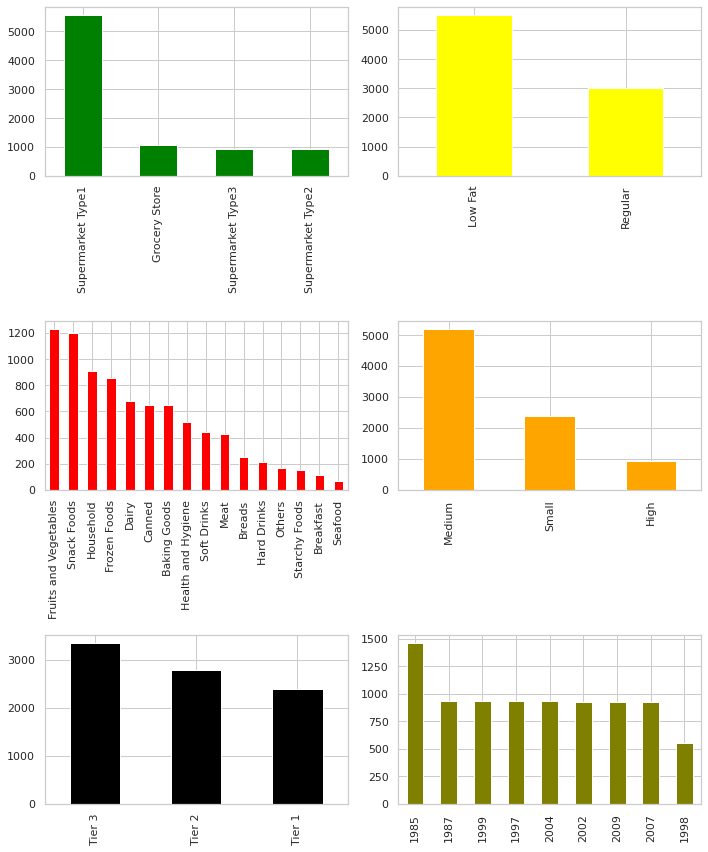

In [60]:
plt.figure(1)
plt.subplot(321)
bms['Outlet_Type'].value_counts().plot(figsize=(10,12),kind='bar',color='green')

plt.subplot(322)
bms['Item_Fat_Content'].value_counts().plot(figsize=(10,12),kind='bar',color='yellow')

plt.subplot(323)
bms['Item_Type'].value_counts().plot(figsize=(10,12),kind='bar',color='red')

plt.subplot(324)
bms['Outlet_Size'].value_counts().plot(figsize=(10,12),kind='bar',color='orange')

plt.subplot(325)
bms['Outlet_Location_Type'].value_counts().plot(figsize=(10,12),kind='bar',color='black')

plt.subplot(326)
bms['Outlet_Establishment_Year'].value_counts().plot(figsize=(10,12),kind='bar',color='olive')


plt.tight_layout()
plt.show()

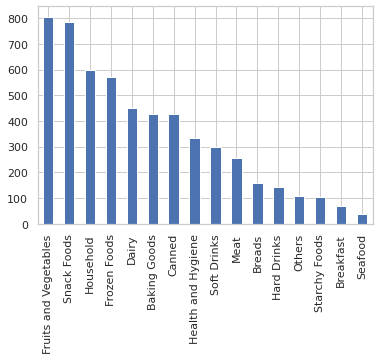

In [78]:
bms[bms["Outlet_Type"]=="Supermarket Type1"]["Item_Type"].value_counts().plot(kind="bar")

Jadi item type yang sering dijual di sumpermarket tipe 1 adalah fruit, vagetables, snack food, household, frozex food dan diary.

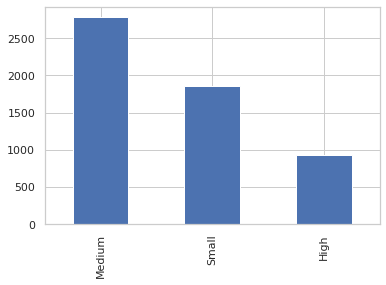

In [81]:
#untuk mengetahui Outlet_size di supermarket type 1
bms[bms['Outlet_Type']=="Supermarket Type1"]["Outlet_Size"].value_counts().plot(kind="bar")

#Boxplot

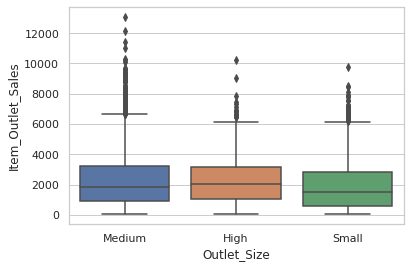

In [61]:
ax = sns.boxplot(x="Outlet_Size", y="Item_Outlet_Sales", data=bms)

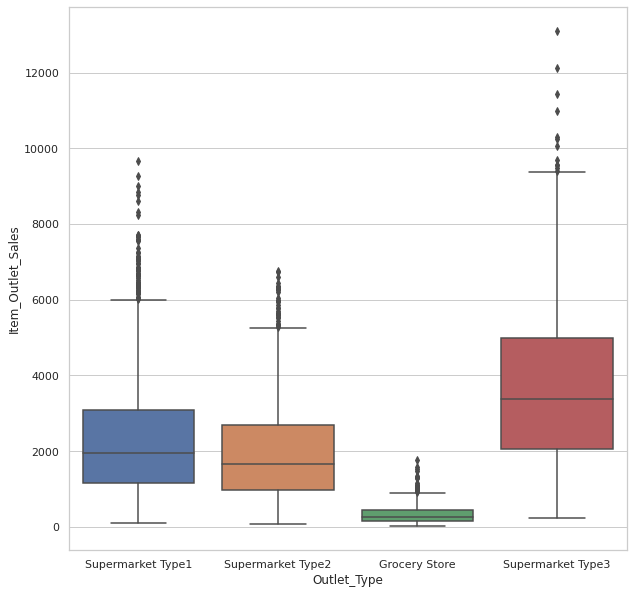

In [87]:
#berdasarkan outlet_Size=Medium
fig,axes = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=bms[bms["Outlet_Size"]=="Medium"])

Ternyata berdasarkan tipe outlet yang medium, persebaran penjualan paling banyak ada di supermarket type 3 dengan range sekitar 0-13000

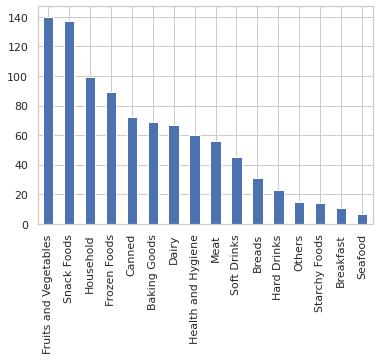

In [89]:
bms_medium = bms[bms["Outlet_Size"]=="Medium"]
bms_medium[bms_medium["Outlet_Type"]=="Supermarket Type3"]["Item_Type"].value_counts().plot(kind="bar")

dengan type outlet medium, type barang yang dijual di supermarket type 3 adalah fruit, vagetables, snack foods, house hold, frozen food dan canned

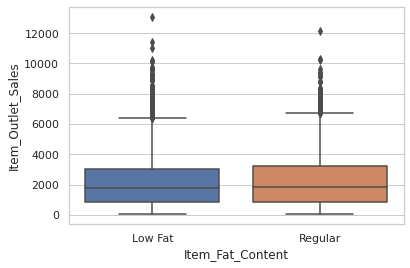

In [62]:
ax = sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=bms)

<function matplotlib.pyplot.plot>

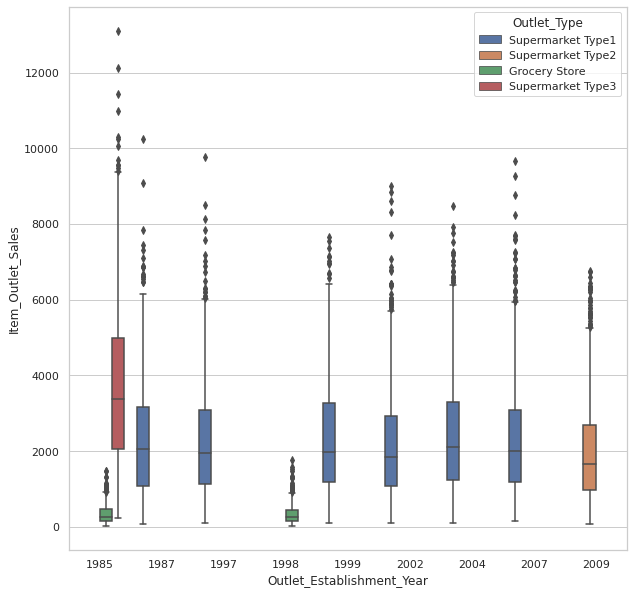

In [63]:
fig,axes = plt.subplots(figsize = (10,10))
sns.boxplot(x = bms['Outlet_Establishment_Year'], y = bms['Item_Outlet_Sales'], hue = bms['Outlet_Type'], ax = axes )
plt.plot

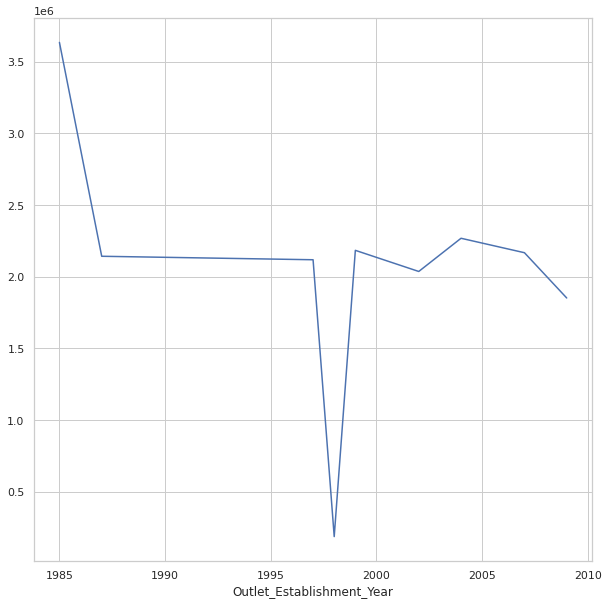

In [108]:
fig,axes = plt.subplots(figsize = (10,10))
bms.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].sum().plot(kind="line")

In [109]:
bms.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].sum()

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

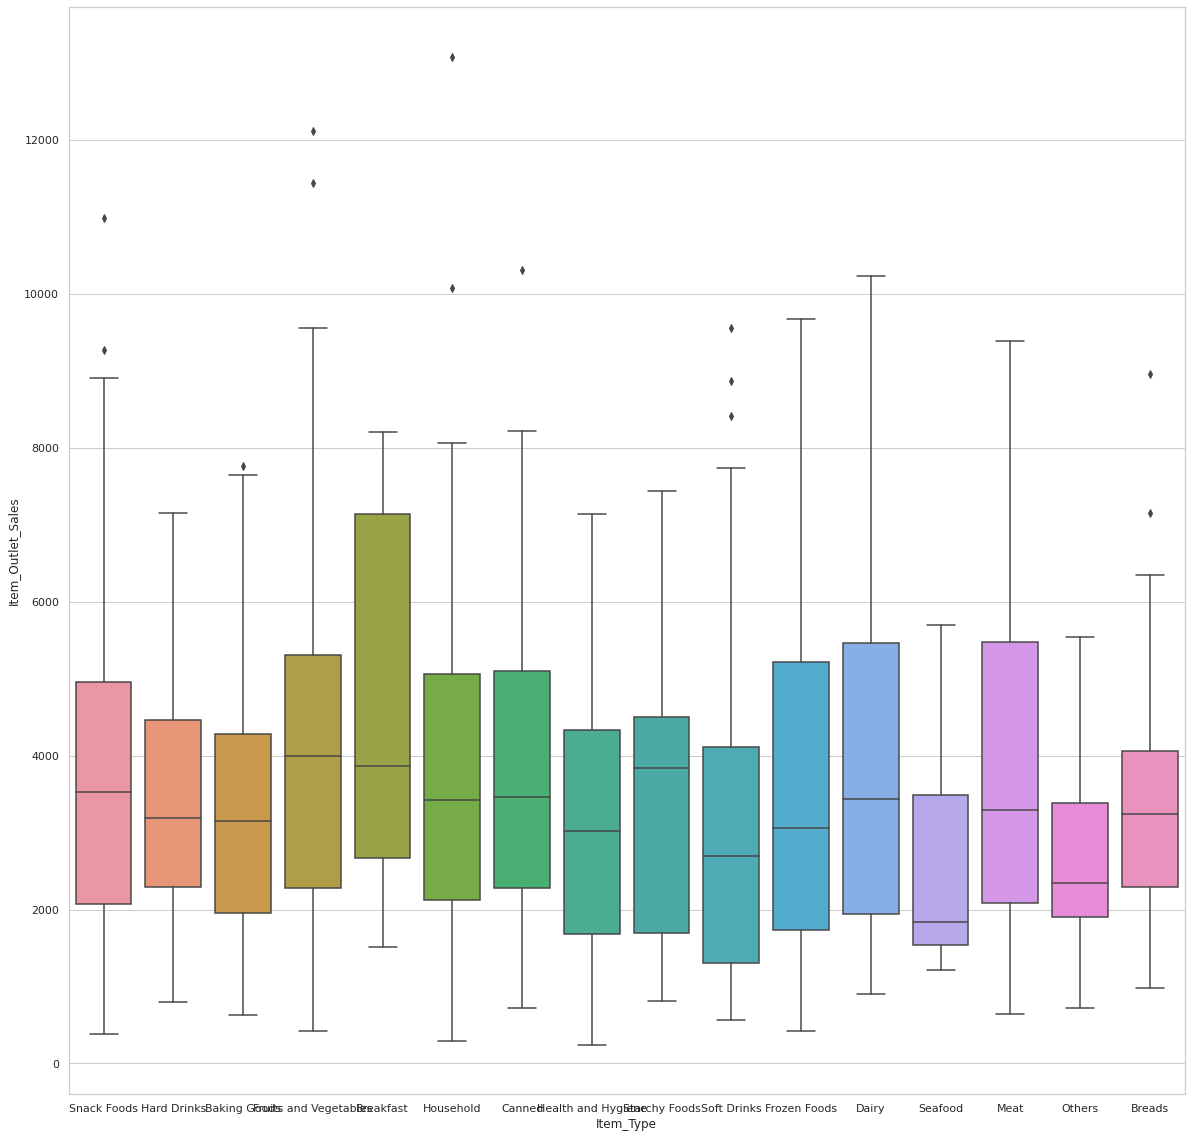

In [96]:
#supermarket type 3
#sales dengan tipe apa yang paling mahal?
fig,axes = plt.subplots(figsize = (20,20))
bms_market3=bms[bms['Outlet_Type']=="Supermarket Type3"]
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=bms_market3)